> Importing libraries

In [1]:
import pandas as pd
import requests
import tweepy
import time
import json
import numpy as np
import re
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter.shape

(2356, 17)

In [4]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> Quality Issue #1 Find Tweets that are retweets and delete them

In [7]:
df_twitter[df_twitter.retweeted_status_id.isnull() == False].tweet_id.count()

181

In [8]:
df_twitter.drop(index = df_twitter[df_twitter.retweeted_status_id.isnull() == False].index, inplace=True)

In [9]:
df_twitter.shape

(2175, 17)

> Quality Issue #2 Drop columns that are related to retweets

In [10]:
df_twitter.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [11]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> Quality Issue #3 Dropping columns "in_reply_to_status_id", "in_reply_to_user_id"

In [12]:
df_twitter.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

> Quality Issue #4 Updating "source" column to make it easier to read.

In [13]:
df_twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
df_twitter['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone','<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}, inplace=True)

In [15]:
df_twitter.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

> Quality Issue #5 Converting timestamp column to datetime datatype

In [16]:
df_twitter['timestamp'] = pd.to_datetime(df_twitter['timestamp'], format = '%Y-%m-%d %H')

In [17]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


> Checking to see if dogs fit in more than one stage ('doggo', 'puppo', 'floofer', 'pupper')

In [18]:
df_twitter[(df_twitter['doggo'] == 'doggo') & ((df_twitter['puppo'] != 'None') | (df_twitter['floofer'] != 'None') | (df_twitter['pupper'] != 'None')) | (df_twitter['puppo'] == 'puppo') & ((df_twitter['doggo'] != 'None') | (df_twitter['floofer'] != 'None') | (df_twitter['pupper'] != 'None')) | (df_twitter['floofer'] == 'floofer') & ((df_twitter['doggo'] != 'None') | (df_twitter['puppo'] != 'None') | (df_twitter['pupper'] != 'None')) | (df_twitter['pupper'] == 'pupper') & ((df_twitter['doggo'] != 'None') | (df_twitter['puppo'] != 'None') | (df_twitter['floofer'] != 'None'))].count()

tweet_id              12
timestamp             12
source                12
text                  12
expanded_urls         12
rating_numerator      12
rating_denominator    12
name                  12
doggo                 12
floofer               12
pupper                12
puppo                 12
dtype: int64

> Tidiness Issue #1 Combining 'doggo', 'puppo', 'floofer', 'pupper' columns into one column for stage of the dogs.

In [19]:
def doggo(doggo):
    return str(doggo.replace("None","").replace("doggo","doggo,"))
def puppo(puppo):
    return str(puppo.replace("None","").replace("puppo","puppo,"))
def floofer(floofer):
    return str(floofer.replace("None","").replace("floofer","floofer,"))
def pupper(pupper):
    return str(pupper.replace("None","").replace("pupper","pupper,"))

df_twitter['stage'] = df_twitter['doggo'].apply(doggo) + df_twitter['puppo'].apply(puppo) + df_twitter['floofer'].apply(floofer) + df_twitter['pupper'].apply(pupper)

> Removing 'comma' at the end of the string and updating 'stage' column to 'None' if null

In [20]:
for i in df_twitter[df_twitter['stage'].str[-1] == ","].index:
    df_twitter.loc[i,'stage'] = df_twitter.loc[i,'stage'][0:len(df_twitter.loc[i,'stage'])-1]

In [21]:
for i in df_twitter[df_twitter['stage'] == ""].index:
    df_twitter.loc[i,'stage'] = "None"

> Checking if 'stage' column has been updated correctly

In [22]:
df_twitter['stage'].value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

In [23]:
df_twitter[(df_twitter['doggo'] == 'doggo') | (df_twitter['puppo'] == 'puppo') | (df_twitter['floofer'] == 'floofer') | (df_twitter['pupper'] == 'pupper')].tweet_id.count()

344

In [24]:
df_twitter[(df_twitter['doggo'] != 'None') | (df_twitter['puppo'] != 'None') | (df_twitter['floofer'] != 'None') | (df_twitter['pupper'] != 'None')].tweet_id.count()

344

> Dropping 'doggo', 'floofer', 'puppo', and 'pupper' columns

In [25]:
df_twitter.drop(columns = ['doggo', 'floofer', 'puppo', 'pupper'], inplace=True)

In [26]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 249.9+ KB


> Reading Image predictions file into a DataFrame

In [27]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [28]:
df_img = pd.read_csv('img_predictions.tsv', sep='\t')

In [29]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
df_img.shape

(2075, 12)

> Tidiness Issue #2 Merging df_twitter and df_img. Performing a left join, i.e. keeping all records from df_twitter.

In [31]:
df_combined = pd.merge(df_twitter, df_img, how='left', on=['tweet_id'])

In [32]:
df_combined.shape

(2175, 20)

In [33]:
#len(np.setdiff1d(np.array(df_twitter.tweet_id) , np.array(df_img.tweet_id)))

In [34]:
#len(np.setdiff1d(np.array(df_img.tweet_id), np.array(df_twitter.tweet_id)))

> Quality Issue #6 Converting tweet_id column to str from int, since it's not a numeric field.

In [35]:
df_combined.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
stage                         object
jpg_url                       object
img_num                      float64
p1                            object
p1_conf                      float64
p1_dog                        object
p2                            object
p2_conf                      float64
p2_dog                        object
p3                            object
p3_conf                      float64
p3_dog                        object
dtype: object

In [36]:
df_combined['tweet_id'] = df_combined['tweet_id'].astype(str)

In [37]:
df_combined.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
stage                         object
jpg_url                       object
img_num                      float64
p1                            object
p1_conf                      float64
p1_dog                        object
p2                            object
p2_conf                      float64
p2_dog                        object
p3                            object
p3_conf                      float64
p3_dog                        object
dtype: object

> Getting additional twitter data using twitter API.

In [38]:
#consumer_key = 'SaZq6kaBAM0kjqBcKr5Im3mID'
#consumer_secret = 'xz7grztQgbzY4iJAifQGn4rvOZsoz4ahmQqVZkWf2X66Xmvwph'
#access_token = '17729020-uYAFaXHmyjZNrmZi6MI8t8ixjiaKRBS7pmv28GMFP'
#access_secret = 'AuhZrkBTr1hidmY2RQLLpgcqeA1HS5MaJbZU5DIS4KQXD'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [39]:
#df_tweet = pd.DataFrame(columns=['tweet_id','retweet_count','favourite_count'])
#for i in range(df.shape[0]):
#    try:
#        data = api.get_status(df.tweet_id[i], tweet_mode = 'extended')
#        tweet_id = data['id_str']
#        retweet_count = data['retweet_count']
#        favourite_count = data['favorite_count']
#        df_tweet = df_tweet.append(pd.DataFrame([[tweet_id,retweet_count,favourite_count]],columns = ['tweet_id','retweet_count','favourite_count']))               
#        a += 1
#    except:
#        b += 1
#        continue

In [40]:
#print(a, b)

In [41]:
#df_tweet.to_csv('tweet_data_final.csv')

In [9]:
df_tweet = pd.read_csv('tweet_data_final.csv')

In [11]:
df_tweet.shape

(2331, 4)

> Dropping "Unnamed: 0" column

In [44]:
df_tweet.drop(columns = 'Unnamed: 0', inplace=True)

In [45]:
df_tweet.dtypes

tweet_id           int64
retweet_count      int64
favourite_count    int64
dtype: object

> Converting 'tweet_id' to object

In [46]:
df_tweet['tweet_id'] = df_tweet['tweet_id'].astype(str)

In [47]:
df_tweet.dtypes

tweet_id           object
retweet_count       int64
favourite_count     int64
dtype: object

> Tidiness Issue #3 Merging df_combined and df_tweet. Performing a left join, i.e. keeping all records from df_combined.

In [48]:
df_final = pd.merge(df_combined, df_tweet, how='left', on=['tweet_id'])

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count         2

> Quality Issue #7 Converting datatype of 'retweet_count' and 'favourite_count to integer and filling null values with zero

In [50]:
df_final['retweet_count'].fillna(0, inplace=True)
df_final['favourite_count'].fillna(0, inplace=True)

In [51]:
df_final['retweet_count'] = df_final['retweet_count'].astype('int32')
df_final['favourite_count'] = df_final['favourite_count'].astype('int32')

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count         2

> Quality Issue #8 Checking Ratings with incorrectly extracted ratings and dropping them

In [53]:
df_final.shape

(2175, 22)

In [54]:
pattern = r"[0-9]+/[0-9]+"
output = pd.DataFrame(columns=['tweet_id', 'numerator', 'denominator', 'rating'])
for i in range(df_final.shape[0]):
    output = output.append({'tweet_id':df_final.loc[i, 'tweet_id'], 
                            'numerator':df_final.loc[i,'rating_numerator'], 
                            'denominator':df_final.loc[i,'rating_denominator'], 
                            'rating':re.findall(pattern, df_final.loc[i,'text'])}, 
                                                ignore_index=True)

In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [56]:
rating_dup_id = []
for i in range(output.shape[0]):
    if len(output.loc[i,'rating']) > 1:
        rating_dup_id.append(output.iloc[i, 0])

len(rating_dup_id)        

30

In [57]:
df_final.query('tweet_id in @rating_dup_id')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
52,881633300179243008,2017-07-02 21:58:53,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,17,10,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,118
263,835246439529840640,2017-02-24 21:54:03,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,2110
619,777684233540206592,2016-09-19 01:42:24,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1.0,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True,2983,11407
832,747600769478692864,2016-06-28 01:21:27,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,None,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1.0,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True,556,2329
890,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,13293,34957
987,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,1548,4074
1024,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,207,2361
1044,714258258790387713,2016-03-28 01:10:13,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,None,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1.0,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True,714,3018
1180,703356393781329922,2016-02-26 23:10:06,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,None,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1.0,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True,383,1913
1280,695064344191721472,2016-02-04 02:00:27,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgX

> Dropping rows with multiple ratings.

In [58]:
df_final.drop(index = df_final.query('tweet_id in @rating_dup_id').index, inplace=True)

In [59]:
df_final.query('tweet_id in @rating_dup_id').tweet_id.count()

0

In [60]:
df_final.shape

(2145, 22)

> Dropping rows with rating denominator not equal to 10

In [61]:
df_final[df_final['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
287,832088576586297345,2017-02-16 04:45:50,Twitter for iPhone,@docmisterio account started on 11/15/15,NaN,11,15,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,62
363,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,3283,12383
429,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1468,5449
733,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1.0,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2231,4820
942,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,1259,3824
1050,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,738,2818
1075,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,555,2304
1095,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,640,2418
1172,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,911,2914
1254,697463031882764288,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rate

In [62]:
df_final.drop(index = df_final[df_final['rating_denominator'] != 10].index, inplace=True)

In [63]:
df_final.shape

(2129, 22)

In [64]:
df_final.to_csv('twitter_archive_master.csv', index=False)

> Insight #1 What source is most used in tweets about WeRateDogs?

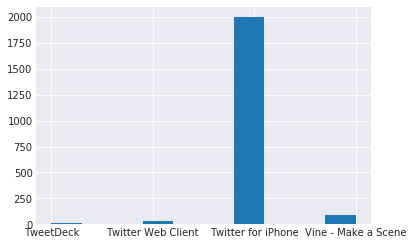

In [65]:
plt.hist(df_final['source']);

> The histogram suggests that "Twitter for iPhone" app is the most preferred source for tweeting

> Insight #2 Top 3 dogs that are most retweeted and favourited.

In [66]:
df_final.sort_values(by='retweet_count', ascending=False).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
862,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,77878,156361
901,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,1.0,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True,57739,115520
445,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13,10,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1.0,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,56769,120788


> The top 3 most retweeted dogs have their video posted instead of just a picture.

In [67]:
df_final.sort_values(by='favourite_count', ascending=False).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
862,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,77878,156361
348,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,43866,133190
445,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13,10,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1.0,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,56769,120788


>- The 2 out of the top 3 most favourited dogs have their video posted instead of just a picture.

> Insight #3 Most common dog name?

In [68]:
df_final.name.value_counts()

None              653
a                 54 
Charlie           11 
Lucy              11 
Cooper            10 
Oliver            10 
Penny             9  
Tucker            9  
Lola              8  
Sadie             8  
Winston           8  
the               8  
Toby              7  
Daisy             7  
Stanley           6  
Jax               6  
Koda              6  
Bailey            6  
Bo                6  
Bella             6  
Oscar             6  
Chester           5  
Buddy             5  
Leo               5  
Rusty             5  
Dave              5  
Milo              5  
Louis             5  
Scout             5  
an                5  
Bentley           5  
Larry             4  
Jerry             4  
Brody             4  
Scooter           4  
Jack              4  
very              4  
George            4  
one               4  
Alfie             4  
Oakley            4  
Boomer            4  
Finn              4  
Dexter            4  
Sophie            4  
Duke      

> Charlie and Lucy are the most common dog names followed closely by Cooper and Oliver, according to this dataset.

> Insight #4 Accuracy of the neural network program in correctly predicting the breed of the dog?

In [69]:
df_final['p1_dog'].value_counts(dropna=False)

True     1442
False    512 
NaN      175 
Name: p1_dog, dtype: int64

In [70]:
df_final[df_final['p1_dog'] == True].tweet_id.count()/df_final[df_final['p1_dog'] != ''].tweet_id.count()

0.67731329262564588

> The neural network program can accurately predict the breed of the dog 67.73% of the times.

> Day of the week when most tweets are posted according to this dataset

In [71]:
df_final['timestamp'].isnull().sum()

0

In [73]:
df_final['day_of_creation'] = df_final['timestamp'].dt.day_name()

In [81]:
sun, mon, tue, wed, thu, fri, sat = df_final['day_of_creation'].value_counts()

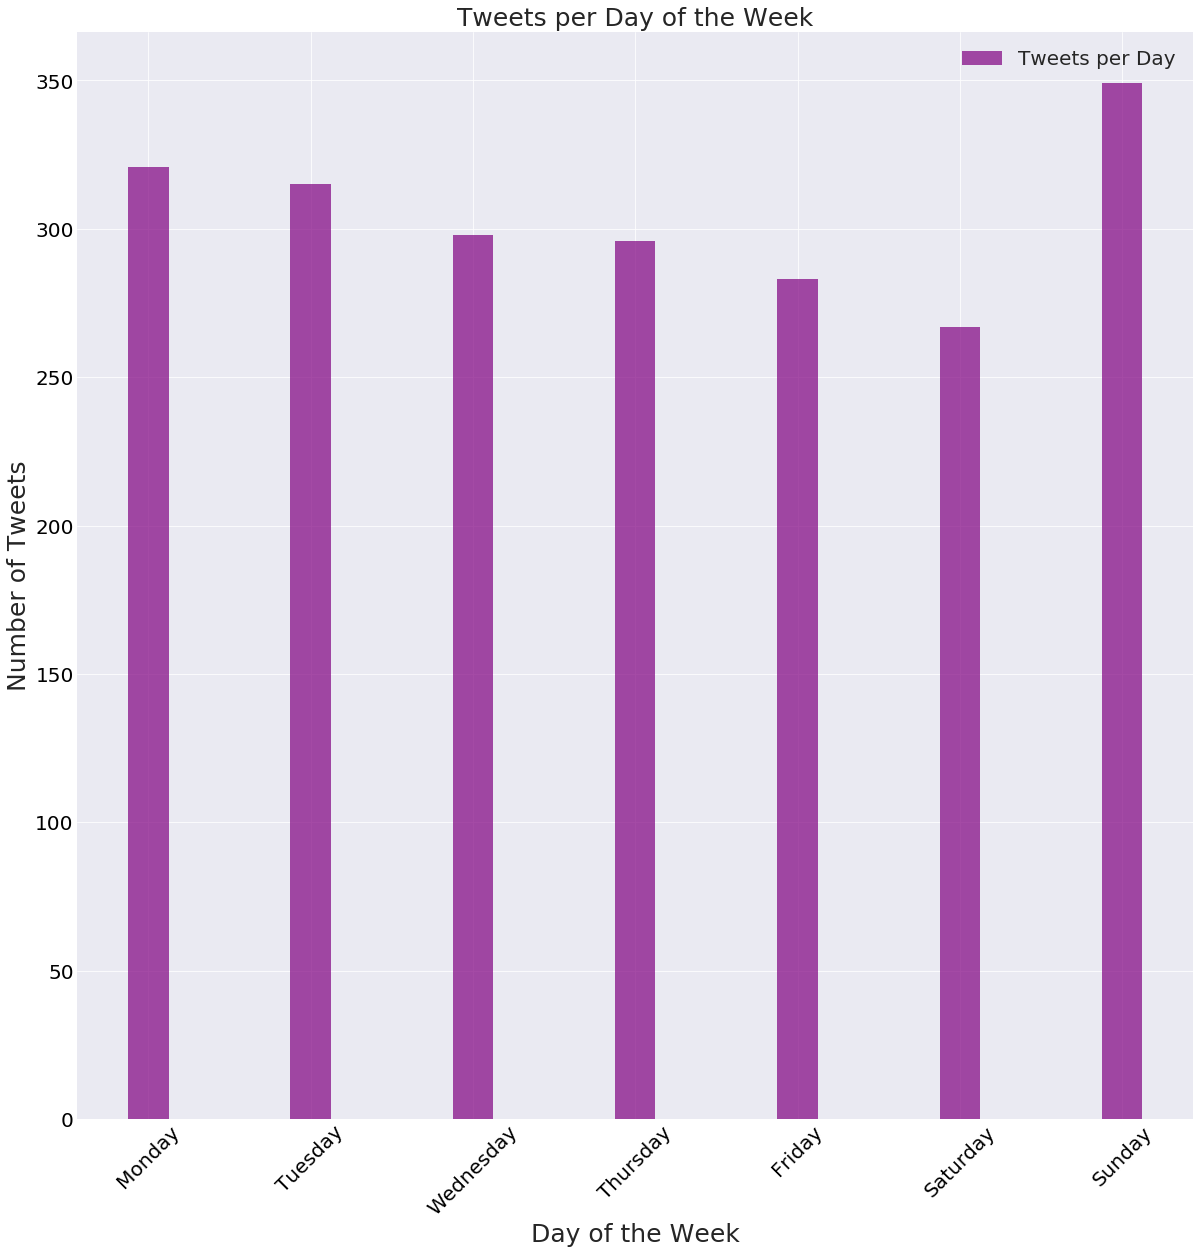

In [132]:
#bins_list = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#plt.hist(df_final['day_of_creation'], bins = bins_list);

x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([mon, tue, wed, thu, fri, sat, sun])

width = 0.25
# plot bars
plt.bar(x, y, width, color='purple', alpha=.7, label='Tweets per Day');

# title and labels
plt.ylabel('Number of Tweets', fontsize=25)
plt.xlabel('Day of the Week', fontsize=25)
plt.title('Tweets per Day of the Week', fontsize=25)
locations = x  # xtick locations
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  # xtick labels
plt.xticks(locations, labels)
plt.tick_params(axis="x", labelsize=20, rotation=45, labelcolor="black")
plt.tick_params(axis="y", labelsize=20, labelcolor="black")

# legend
plt.legend();

> Unsurprisingly, Sunday is the day that most tweets were created but surprisingly Saturday is the day that least tweets were created!